In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

/home/iovcharenko/Documents/NotWork/UCU/liner-algebra/ucu-linear-algebra-final-project


In [3]:
import torch 
import random 

import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt 

from pathlib import Path
from tqdm.cli import tqdm 


from src.neural_svd import NeuralSVD
from src.neural_svd import SimpleSVDModel
from src.neural_svd import NeuralSVDModel
from src.neural_svd import NeuralSVDModelWithBias
from src.metrics import rmse

In [4]:
data_folder = Path("data")

In [5]:
df = pd.read_csv(data_folder / "subsets" / "low-sparsity" / "records.csv")
# df = pd.read_csv(data_folder / "subsets" / "mid-sparsity" / "records.csv")
# df = pd.read_csv(data_folder / "subsets" / "high-sparsity" / "records.csv")

tr_df = df[df.split == "train"].reset_index(drop=True)
val_df = df[df.split == "val"].reset_index(drop=True)

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [7]:
model = NeuralSVD(
    k=50, n_epochs=50, reg=0.0,
    lr=0.1, batch_size=128,
    device=device, 
#     model_type=SimpleSVDModel
    model_type=NeuralSVDModel,
    
    use_scheduler=True,
    scheduler_step=20,
    scheduler_gamma=0.1,
)
model.fit(tr_df, val_df)

train loop, loss 0.9594854772464069, lr 0.0010000000000000002, val rmse 0.9809690192599654: 100%|██████████| 50/50 [02:24<00:00,  2.89s/it]


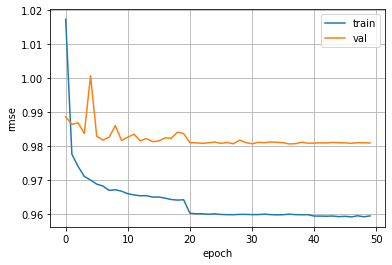

In [8]:
model.plot()

In [9]:
val_preds = model.predict(val_df)
print("val rmse:", rmse(val_df.rating.values, val_preds))

val rmse: 0.9809690192599654
